### ECE-GY 6123
### Nikita Makarov, Fall 2024

### Homework 1

Problem 1a:

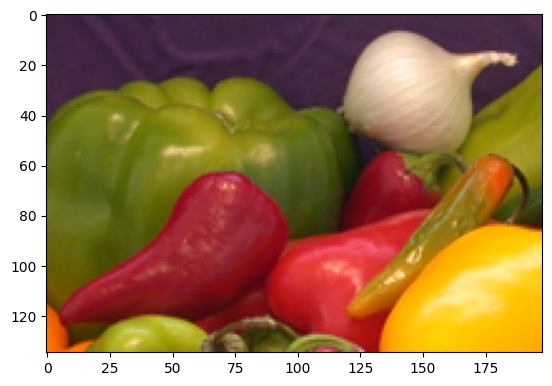

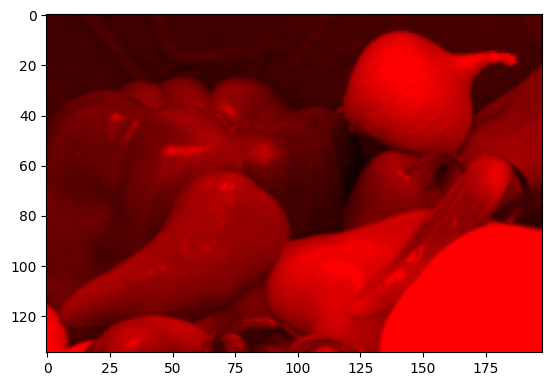

In [12]:
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Load color image
img = Image.open('onion.png')
img.load()
RGB_data = np.asarray(img) # This image has 24 bit depth (8x3)

# Create image for RGB
plt.figure()
plt.imshow(RGB_data)

# Create image for R channel
R_data = np.zeros_like(RGB_data) # Initialize array of zeros
R_data[:,:,0] = RGB_data[:,:,0] # Fill R channel only
plt.figure()
plt.imshow(R_data)

# Display all images
plt.show()